In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from numpy import *
import scipy.io as sio

In [2]:
mat = sio.loadmat('ex3data1.mat')

In [3]:
y = mat['y'].T
X = mat['X'].T
m = X.shape[1]
# get rid of confusing 10 instead of 0...
y[y==10] = 0

In [4]:
def visualize_subset_100(X, y, pred=None):
    _m = X.shape[1]
    fig, axes = plt.subplots(10, 10, sharex=True, sharey=True)
    _indices = np.random.randint(0, _m, 100)
    X_plot = X[:, _indices]
    y_plot = y[:, _indices].flatten()
    if pred is not None:
        pred_plot = pred[_indices]
    for nax, ax in enumerate(axes.flatten()):
        ax.imshow(X_plot[:, nax].reshape((20,20)).T, cmap='viridis', interpolation='none')
        if pred is not None:
            ax.set_title('{}, {}'.format(y_plot[nax], pred_plot[nax]))
        else:
            ax.set_title(str(y_plot[nax]))
        ax.axis('off')

<IPython.core.display.Javascript object>


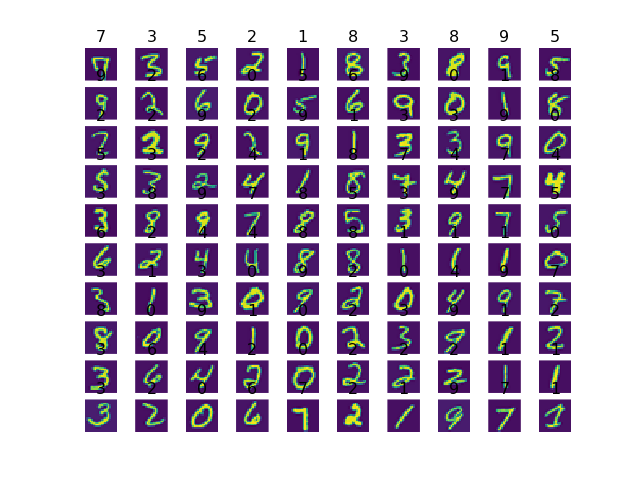

In [5]:
visualize_subset_100(X, y)

In [6]:
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                         # (note that we have mapped "0" to label 10)

In [7]:
from ex2 import costFunctionReg, costFunctionGradientReg

In [8]:
print('\nTesting lrCostFunction()')

theta_t = np.array([-2, -1, 1, 2])[:, None]
X_t = np.c_[ones((5,1)), arange(1,16).reshape((5,3), order='F')/10].T
y_t = (array([1,0,1,0,1]) >= 0.5)[None, :]
lambda_t = 3
J = costFunctionReg(theta_t, X_t, y_t, lambda_t)
grad = costFunctionGradientReg(theta_t, X_t, y_t, lambda_t)

print('\nCost: %f'% J)
print('Expected cost: 2.534819')
print('Gradients:')
print(' {} '.format(grad))
print('Expected gradients:')
print(' 0.146561 -0.548558 0.724722 1.398003')


Testing lrCostFunction()

Cost: 2.240000
Expected cost: 2.534819
Gradients:
 [ 0.14656137 -0.54855841  0.72472227  1.39800296] 
Expected gradients:
 0.146561 -0.548558 0.724722 1.398003


In [9]:
from scipy.optimize import fmin_bfgs
def oneVsAll(X, y, num_labels, lam):
    m = X.shape[1]
    n = X.shape[0]
    initial_theta = zeros((n+1, 1))
    _X = np.r_[ones((1, m)), X]
    all_theta = dict()
    for label in arange(num_labels):
        print ('training one vs all logistic regression classifier for {}'.format(label))
        _y = (y == label).astype(int)
        theta =  fmin_bfgs(costFunctionReg, initial_theta, costFunctionGradientReg, (_X, _y, lam), maxiter=400)
        all_theta[label] = theta
    return all_theta


In [10]:
def h(theta, X):
    return sigmoid(dot(theta.T, X))

In [11]:
def predictOneVsAll(all_theta, X):
    _X = np.r_[ones((1, m)), X]
    probs = np.array([h(theta, _X) for theta in all_theta_arr])
    predictions = probs.argmax(axis=0)
    return predictions

In [12]:
# ============ Part 2b: One-vs-All Training ============
lambda_all = 0.1;
all_theta = oneVsAll(X, y, num_labels, lambda_all);

training one vs all logistic regression classifier for 0
Optimization terminated successfully.
         Current function value: 0.008583
         Iterations: 288
         Function evaluations: 289
         Gradient evaluations: 289
training one vs all logistic regression classifier for 1
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 286
         Function evaluations: 287
         Gradient evaluations: 287
training one vs all logistic regression classifier for 2
         Current function value: 0.050822
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401
training one vs all logistic regression classifier for 3
         Current function value: 0.057618
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401
training one vs all logistic regression classifier for 4
Optimization terminated successfully.
         Current function value: 0.033075
         It

In [13]:
# make an array out of all_theta:
all_theta_arr = np.array([all_theta[k] for k in all_theta.keys()])

In [14]:
# ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta_arr, X);

print('Training Set Accuracy: {}%'.format((pred == y).astype(float).mean()*100))
print('Expected Accurcy: 94.9%')

Training Set Accuracy: 96.48%
Expected Accurcy: 94.9%


<IPython.core.display.Javascript object>


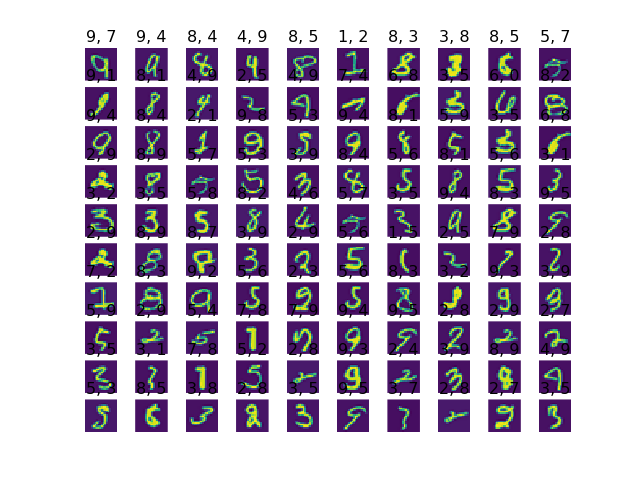

In [15]:
## some intuition:
# visualize the wrongly classified:
indices = np.where(pred != y)[1]
visualize_subset_100(X[:,indices], y[:, indices], pred[indices])

<IPython.core.display.Javascript object>


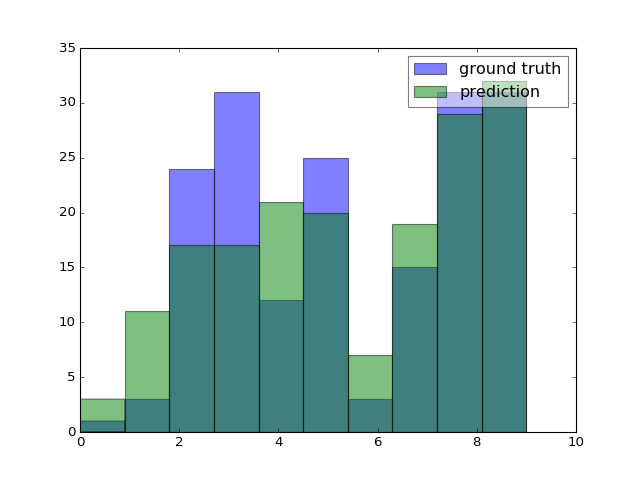

In [16]:
# histogram of wrongly classified:
f, a = plt.subplots(1)
a.hist(y[:, indices].flatten(), alpha = 0.5, label = 'ground truth')
a.hist(pred[indices].flatten(), alpha = 0.5, label = 'prediction')
a.legend(framealpha=0.5)

# Neural nets

In [17]:
# Load the weights into variables Theta1 and Theta2
mat_weights = sio.loadmat('ex3weights.mat')
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [18]:
Theta1, Theta2 = mat_weights['Theta1'], mat_weights['Theta2']

In [19]:
def predict(Theta1, Theta2, X):
    """PREDICT Predict the label of an input given a trained neural network
       p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
       trained weights of a neural network (Theta1, Theta2)"""

    m = X.shape[1]
    num_labels = Theta2.shape[0]
    _X = np.r_[ones((1, m)), X]
    hidden_layer = sigmoid(dot(Theta1, _X))
    _hidden_layer = np.r_[ones((1, hidden_layer.shape[1])), hidden_layer]
    output_layer = sigmoid(dot(Theta2, _hidden_layer))
    # fix the index by adding 1 and setting 10 to 0
    pred = output_layer.argmax(axis=0) + 1
    pred[pred == 10] = 0
    return pred

In [20]:
# ================ Part 3: Predict for One-Vs-All ================

pred = predict(Theta1, Theta2, X)

print('Training Set Accuracy: {}%'.format((pred == y).astype(float).mean()*100))
print('Expected Accurcy: 97.5%')

Training Set Accuracy: 97.52%
Expected Accurcy: 97.5%


In [21]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [22]:
PDF('ex3.pdf',size=(900,500))